# import libraris 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import category_encoders as ce
import re
import string as s
import os
plt.style.use('ggplot')
sns.set(palette='RdBu', context='notebook', style='darkgrid')
%matplotlib inline
for dirname, _, filenames in os.walk('Automobile_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
cars=pd.read_csv('Automobile_data.csv')
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
cars.describe(exclude=['int', 'float'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205,205.000000,205,205,205,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,7,NaN,8,39,37,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,four,NaN,mpfi,3.62,3.4,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,159,NaN,94,23,20,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2555.565854,...,NaN,126.907317,NaN,NaN,NaN,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.680204,...,NaN,41.642693,NaN,NaN,NaN,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1488.000000,...,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2145.000000,...,NaN,97.000000,NaN,NaN,NaN,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2414.000000,...,NaN,120.000000,NaN,NaN,NaN,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.000000,...,NaN,141.000000,NaN,NaN,NaN,NaN,NaN,30.000000,34.000000,NaN


<h1>Data Cleaning</h1>

In [8]:
to_num=['normalized-losses', 'bore','stroke','horsepower','peak-rpm','price']
cars[to_num]=cars[to_num].replace('?','0')
cars[['horsepower','peak-rpm','price', 'normalized-losses']]=cars[['horsepower','peak-rpm','price','normalized-losses']].astype('float')
cars[['bore','stroke']]=cars[['bore','stroke']].astype('float')
cars[to_num]=cars[to_num].replace(0, np.nan)
cars.dropna(subset=['price'], inplace=True)
cars['num-of-doors']=cars['num-of-doors'].replace('?', 'four')

<h1>EDA</h1>

<ipython-input-9-2743818608d3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c2.index,rotation=90)


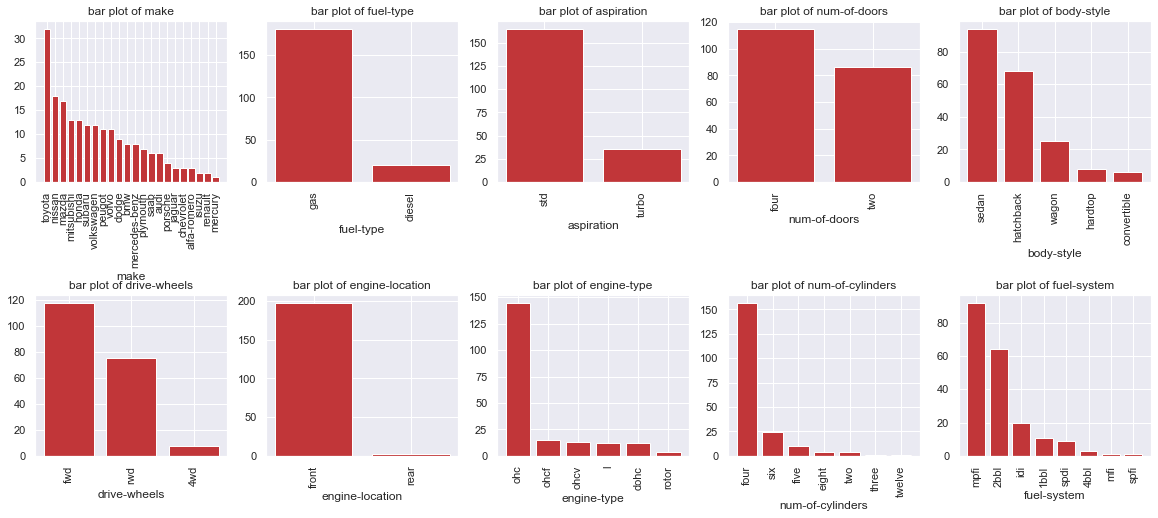

In [9]:
fig=plt.figure(figsize=(20, 8))
cat_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i,j in zip(cars[cat_cols].columns, range(10)):
    ax=fig.add_subplot(2,5,j+1)
    c2=cars[i].value_counts()
    ax.bar(c2.index, c2)
    ax.set_title('bar plot of {}'.format(i))
    ax.set_xlabel(i)
    ax.set_xticklabels(c2.index,rotation=90)
plt.subplots_adjust(hspace=0.7)
plt.show()

<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(c1.index,rotation=90)
<ipython-input-10-62ea4a7669f1>:10: UserWarning: FixedFormatter should only 

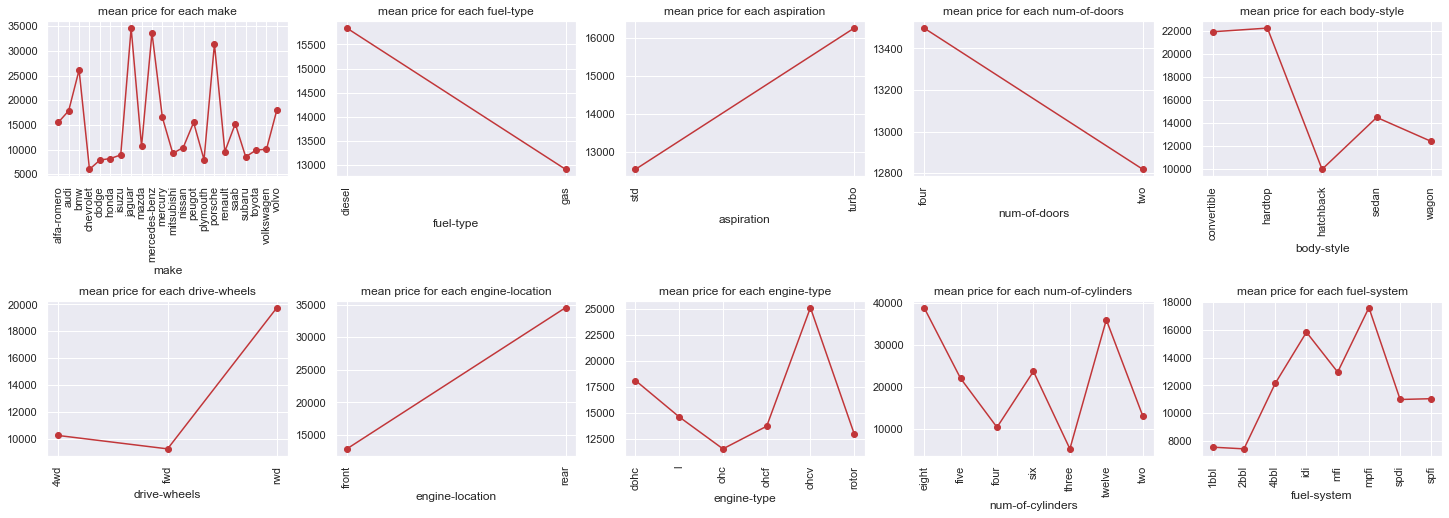

In [10]:
fig=plt.figure(figsize=(25, 8))
cat_cols=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i,j in zip(cars[cat_cols].columns, range(10)):
    ax=fig.add_subplot(2,5,j+1)
    c1=pd.pivot_table(index=i, values='price', data=cars, aggfunc='mean')
    ax.plot(c1.index, c1['price'])
    ax.scatter(c1.index, c1['price'])
    ax.set_title('mean price for each {}'.format(i))
    ax.set_xlabel(i)
    ax.set_xticklabels(c1.index,rotation=90)
plt.subplots_adjust(hspace=0.8)
plt.show()

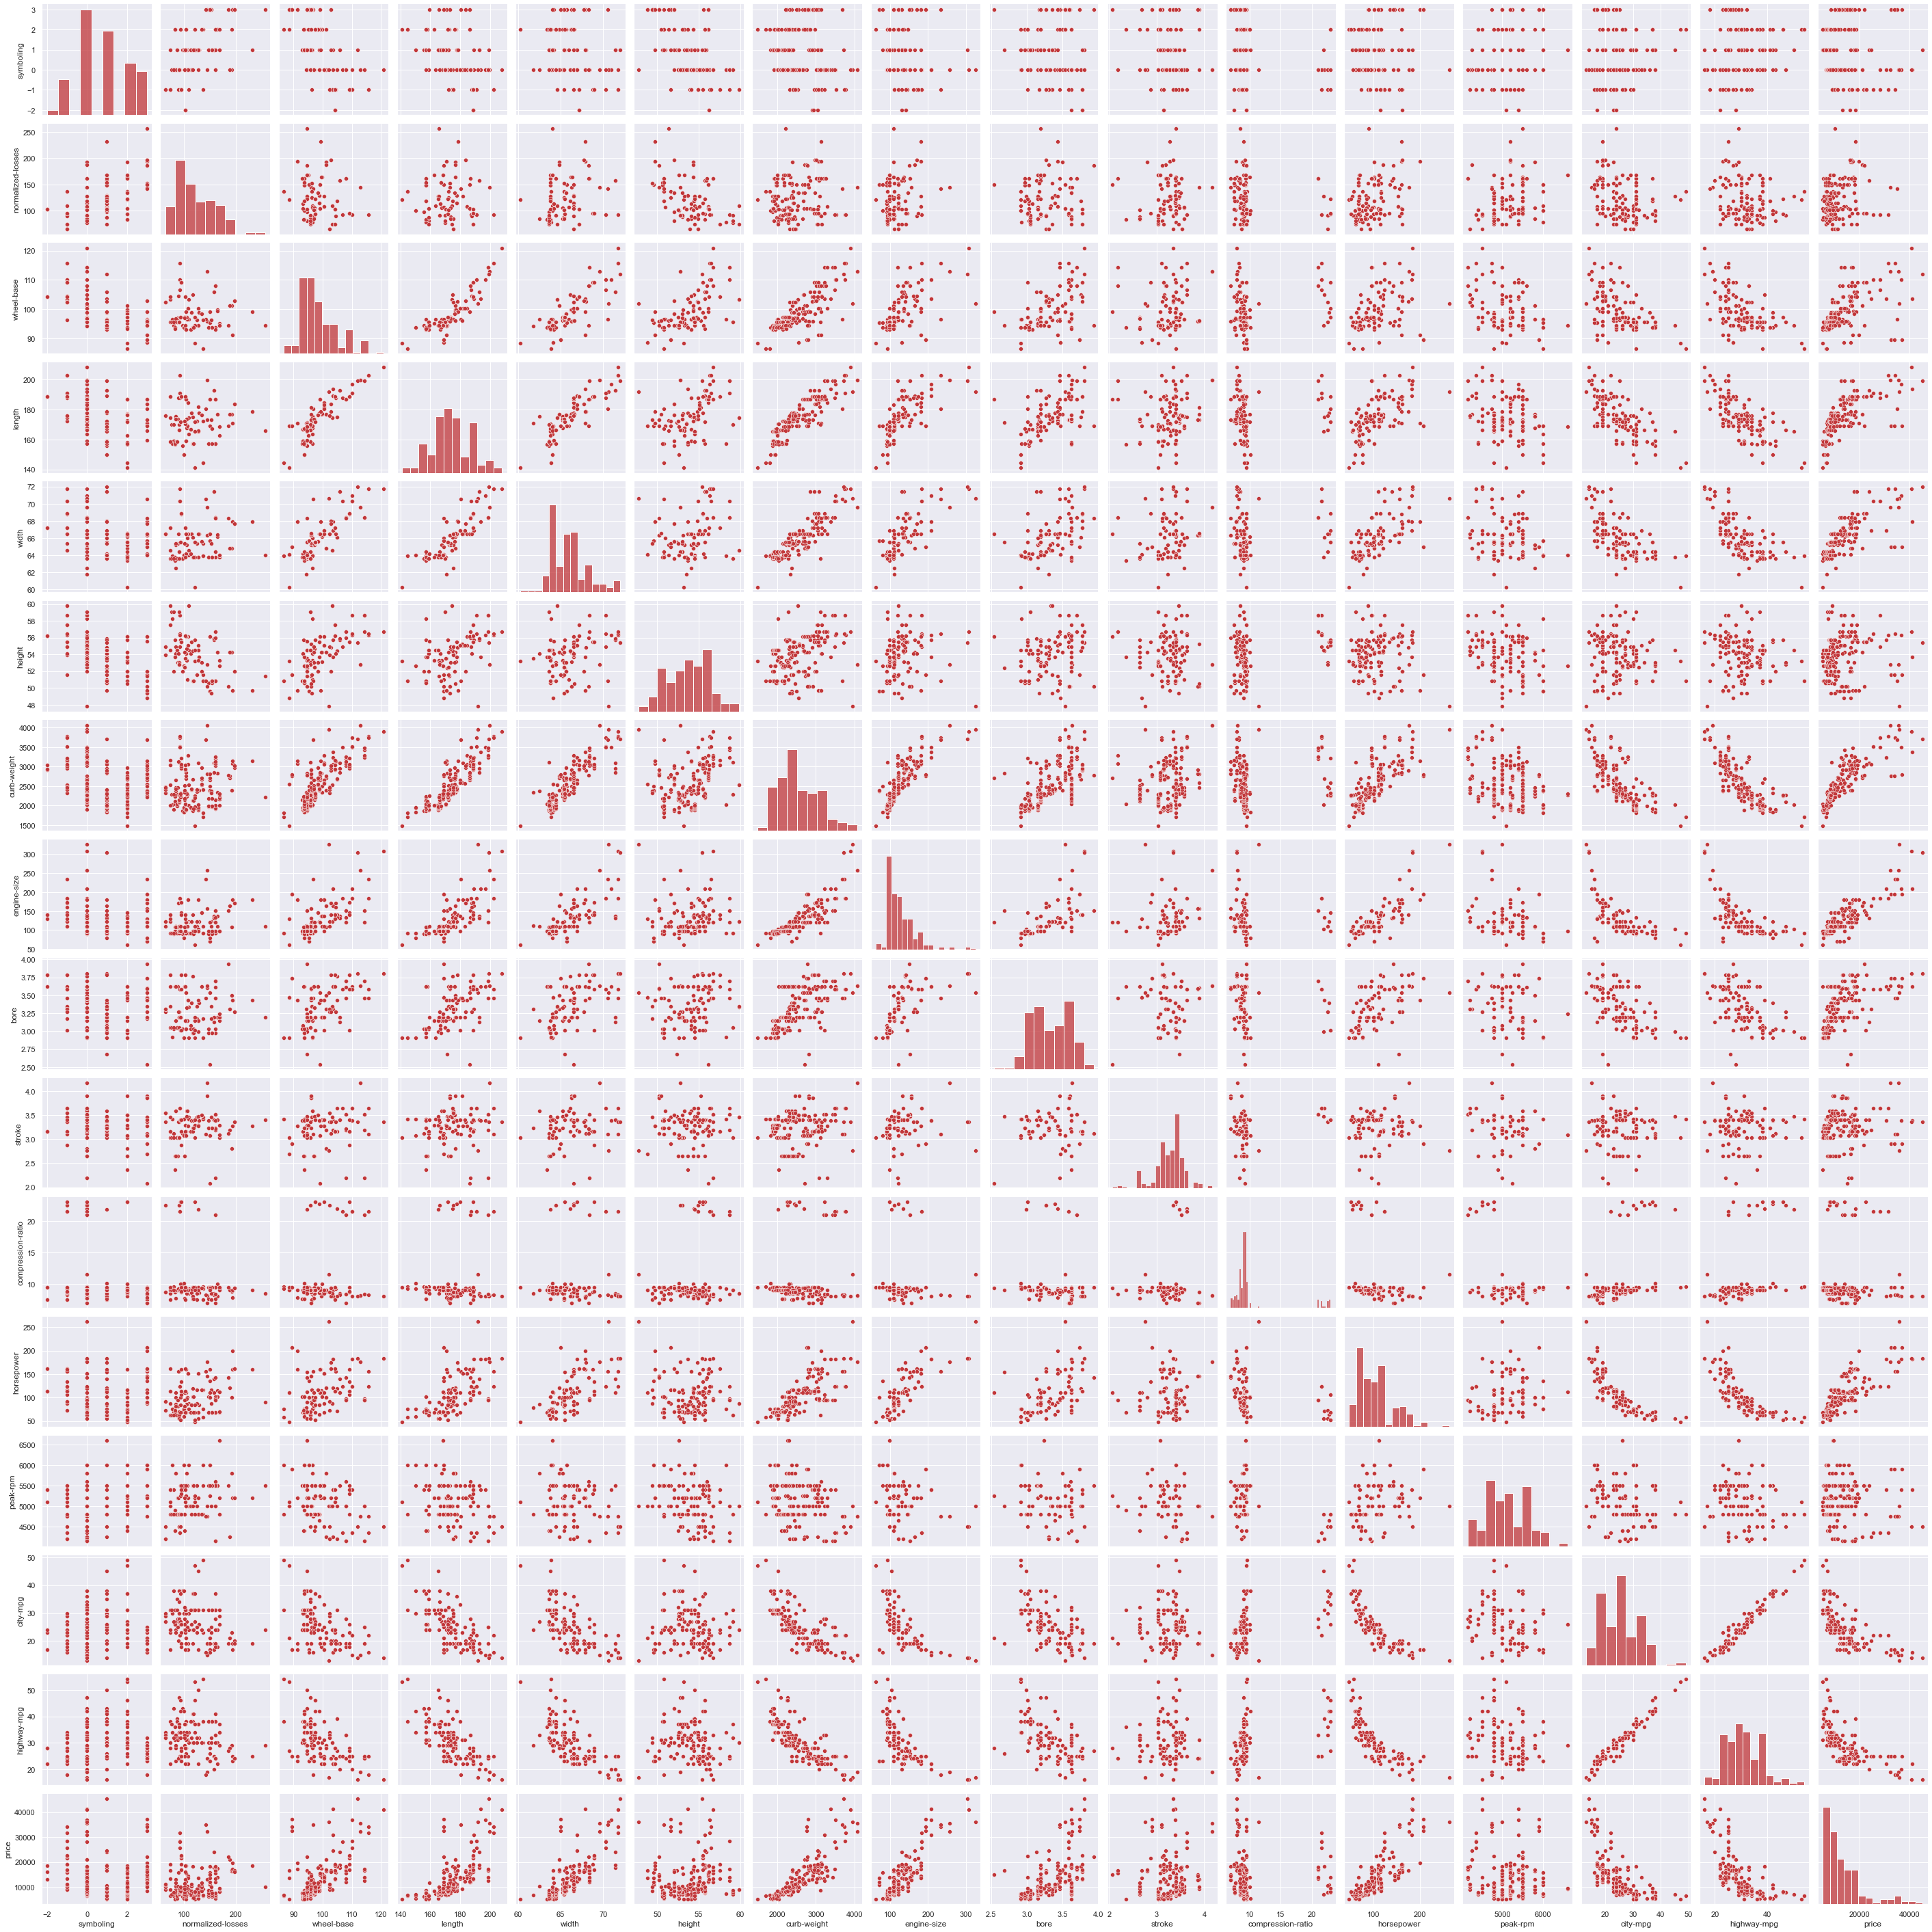

In [11]:
sns.pairplot(cars, diag_kind='hist')
plt.show()

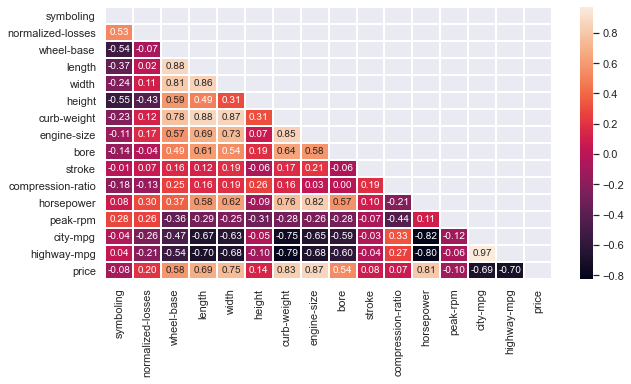

In [12]:
corr_df=cars.corr()
mask=np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,
            annot=True,
            mask=mask,
            fmt='.2f',
            linewidth=1)
plt.show()

In [13]:
#detecting outliers
for i in cars.columns:
    if cars[i].dtype!='object':
        print(i)
        mu=cars[i].mean()
        st=cars[i].std()
        cut_off=st * 3
        lower, upper=mu-cut_off, mu+cut_off
        print('number of outliers',len(cars[(cars[i]>upper)&(cars[i]<lower)]))
        print('\n')
        

symboling
number of outliers 0


normalized-losses
number of outliers 0


wheel-base
number of outliers 0


length
number of outliers 0


width
number of outliers 0


height
number of outliers 0


curb-weight
number of outliers 0


engine-size
number of outliers 0


bore
number of outliers 0


stroke
number of outliers 0


compression-ratio
number of outliers 0


horsepower
number of outliers 0


peak-rpm
number of outliers 0


city-mpg
number of outliers 0


highway-mpg
number of outliers 0


price
number of outliers 0




<h1>Feature Engineering & Preprocessing</h1>

In [14]:
cols_to_drop=['city-mpg', 'engine-location']
cars.drop(cols_to_drop, axis=1, inplace=True)
cars_1=cars.copy()

In [15]:
#x=x.drop('symboling', axis=1)

In [16]:
all_num_cols=[i for i in cars_1.columns if cars_1[i].dtype!='object']
for i in all_num_cols:
    cars_1[i]=cars_1[i].fillna(cars_1[i].mean())

In [17]:
code_cols=[i for i in cars_1.columns if (cars_1[i].dtype=='object')and(cars_1[i].nunique()==2)]
ohe_cols=[i for i in cars_1.columns if (cars_1[i].dtype=='object')and(cars_1[i].nunique()>2)]
all_cat_cols=[i for i in cars_1.columns if cars_1[i].dtype=='object']
st_num_cols=[i for i in cars_1.drop(['compression-ratio', 'price'], axis=1).columns if cars_1[i].dtype!='object']
log_num_cols='compression-ratio'

In [18]:
'''
def to_dummies(df, col):
    c=pd.get_dummies(df[col], prefix=col)
    df=df.drop(col, axis=1)
    df=pd.concat([df, c], axis=1)
    return df
def to_codes(df, col):
    df[col]=pd.Categorical(df[col]).codes
    return df
for i in code_cols:
    x=to_codes(x, i)
for i in ohe_cols:
    x=to_dummies(x,i)
'''

'\ndef to_dummies(df, col):\n    c=pd.get_dummies(df[col], prefix=col)\n    df=df.drop(col, axis=1)\n    df=pd.concat([df, c], axis=1)\n    return df\ndef to_codes(df, col):\n    df[col]=pd.Categorical(df[col]).codes\n    return df\nfor i in code_cols:\n    x=to_codes(x, i)\nfor i in ohe_cols:\n    x=to_dummies(x,i)\n'

In [19]:
def cat_boost(df, cols, target):
    cb=ce.CatBoostEncoder(cols=cols)
    cb.fit(df[cols], df[target])
    c=cb.transform(df[cols]).add_suffix('_cb')
    df=df.drop(cols,axis=1)
    df=pd.concat([df, c], axis=1)
    return df
cars_1=cat_boost(cars_1, all_cat_cols, 'price')

C:\Users\Mohamed_Samir\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [20]:
def standard_scaler(df, col):
    df[col]=(df[col]-df[col].mean())/df[col].std()
    return df
for i in st_num_cols:
    cars_1=standard_scaler(cars_1, i)

In [21]:
def log_transformer(df, col):
    df[col]=np.log(df[col])
    return df
cars_1=log_transformer(cars_1, 'compression-ratio')

In [22]:
x=cars_1.drop('price', axis=1)
y=cars_1['price']

<h1>model Selection</h1>

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [24]:
model=[
    {
        'name':'lasso regression',
        'estimator':Lasso(),
        'hyperparameters':{
            'alpha':np.arange(0.01, 1, 0.02)
        }
    },
    {
        'name':'decision Tree',
        'estimator':DecisionTreeRegressor(),
        'hyperparameters':{
            'max_depth':[2,3,4,5,6,7],
            'criterion':['mse', 'friedman_mse', 'mae'],
            'splitter':['best', 'random'],
            'max_features':['auto', 'sqrt', 'log2']
        }
    },
    {
        'name':'Random Forest',
        'estimator':RandomForestRegressor(),
        'hyperparameters':{
            'n_estimators':[2,3,4,5,6],
            'max_depth':[2,3,4,5,6,7],
            'max_features':['auto', 'sqrt', 'log2']
        }
    },
    {
        'name':'Extreme Gradient Boosting',
        'estimator':XGBRegressor(),
        'hyperparameters':{
            'n_etimators':[10,20,30,40,50],
            'max_depth':[2,4,6,8],
            'subsample':[0.3, 0.5, 0.7, 1],
            'learning_rate':np.arange(0.01, 0.1, 0.01)
        }
    }
]
for i in model:
    print(i['name'])
    gs=GridSearchCV(i['estimator'], param_grid=i['hyperparameters'], cv=3, n_jobs=-1, scoring='r2')
    gs.fit(x_train, y_train)
    print('best score: ', gs.best_score_)
    print('best parameters ; ', gs.best_params_)
    print('best model: ', gs.best_estimator_)
    print('\n')

lasso regression
best score:  0.8847849343967384
best parameters ;  {'alpha': 0.9899999999999999}
best model:  Lasso(alpha=0.9899999999999999)


decision Tree
best score:  0.8649060529513347
best parameters ;  {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'random'}
best model:  DecisionTreeRegressor(max_depth=6, max_features='auto', splitter='random')


Random Forest
best score:  0.8947429990921528
best parameters ;  {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 6}
best model:  RandomForestRegressor(max_depth=6, n_estimators=6)


Extreme Gradient Boosting
[03:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_etimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best scor

In [25]:
xgb=XGBRegressor(learning_rate= 0.09, max_depth= 2, n_etimators= 10, subsample= 1)
xgb.fit(x_train, y_train)
preds=xgb.predict(x_test)
preds[:15]

[03:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_etimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\Mohamed_Samir\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([ 8831.542 , 31174.549 ,  6754.626 ,  7761.954 , 13128.639 ,
        6265.5703, 31679.58  , 10652.003 , 16868.094 , 32440.465 ,
       28337.832 ,  9436.871 , 11669.526 ,  8706.774 , 14282.157 ],
      dtype=float32)

In [26]:
pd.DataFrame({
    'real_values':y_test,
    'predicted_values':preds
})

,real_values,predicted_values
98,8249.0,8831.541992
16,41315.0,31174.548828
31,6855.0,6754.625977
162,9258.0,7761.954102
132,11850.0,13128.638672
118,5572.0,6265.570312
72,35056.0,31679.580078
175,9988.0,10652.002930
179,15998.0,16868.093750
48,35550.0,32440.464844


 # Including analysis & visualization & data preprocessing & ML